In [1]:
!ls

README.md
ScrapBook.ipynb
config.py
zippedData


#zippedData names:
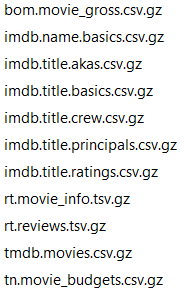

# Imports

In [2]:
import pandas as pd #main
#df = pd.DataFrame(data, columns)
#pd.read_csv(path) can use nrows, skiprows, header, use cols to filter out bad data


import numpy as np #using numpy arrays and computation, can be done in pandas
from scipy import stats # for finding the mode

import requests #for pulling data from websites
#request = requests.get(url), use param={credentials} with access tokens for API


from bs4 import BeautifulSoup #for webscraping 
import json
#with open(file.json) as f:
#    data = json.load(f)

import sqlite3 #sql
#conn = sqlite3.connect(data path)
#cur = conn.cursor()
#cur.execute(select statement;).fetch or .fetchall
#conn.close when done

from pandasql import sqldf #secondary sql using pandas
psyqldf = lambda q: sqldf(q,globals())
#pd.read_sql(query,conn)
#df.query(condition, not select)
#results = pysqldf(q) where q is the select statement
#df.eval(c=a+b) adds column C to DF where it calculates a+b

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Cleaning Strats

In [3]:
#df.loc... astype(type) converts the column(s) found to the type you want (df.loc[column].astype(int))
#pd.to_datetime(df[column with dates])
# .map for series  .apply for multiple columns  .applymap for entire dataframe
#pd.concat([df1 .... dfN]) joins dataframes vertically unless axis =1
# df1.join(...), df.merge, df.is_na().sum(), df.fillna(replacement of na)
#df.duplicated().value_counts()
#df.drop_duplicates()

# Looking at the Overall Contents of Provided Data Sets
___________

In [4]:
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [5]:
movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


### IMDB DataSets
___________________________________

In [6]:
imdb_name_basics = pd.read_csv('zippedData/imdb.name.basics.csv.gz')

In [7]:
imdb_name_basics

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


In [8]:
imdb_title_akas = pd.read_csv('zippedData/imdb.title.akas.csv.gz')

In [9]:
imdb_title_akas

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0
331700,tt9880178,1,La atención,NaN,NaN,original,NaN,1.0
331701,tt9880178,2,La atención,ES,NaN,NaN,NaN,0.0


In [10]:
imdb_title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')

In [11]:
imdb_title_basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [12]:
imdb_title_crew = pd.read_csv('zippedData/imdb.title.crew.csv.gz')

In [13]:
imdb_title_crew

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
...,...,...,...
146139,tt8999974,nm10122357,nm10122357
146140,tt9001390,nm6711477,nm6711477
146141,tt9001494,"nm10123242,nm10123248",NaN
146142,tt9004986,nm4993825,nm4993825


In [14]:
imdb_title_principals = pd.read_csv('zippedData/imdb.title.principals.csv.gz')

In [15]:
imdb_title_principals

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN


In [16]:
imdb_title_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')

In [17]:
imdb_title_ratings

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


### Rotten Tomatoes Data Sets
___________________

In [18]:
rt_movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')

In [19]:
rt_movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [20]:
rt_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t',encoding='latin-1')

In [21]:
rt_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [22]:
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')

In [23]:
tmdb_movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [24]:
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [25]:
tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


# IMDB Cleaning and Merging
_____________

In [26]:
### Goals
# Find top 5 genres using Ratings and title basics
# Merge results into Principals to be the main data frame
# Merge name basics into Principals too
# Want Actors/Actress, Director, Producer, Writer, Composer
#      Should still be alive and at most 75 (steven spielbergs age)
# Want crew who worked on movies in the top 5 genres
# Figure out to do with NA values across the board for runtime minutes, 
# Group crew by average rating on their movies in the genres


## Finding the Top 5 Genres in IMDB

In [27]:
# Combining the ratings into title basics so we have all the title information
ratings = imdb_title_basics.merge(imdb_title_ratings, on = "tconst", how = "inner")

In [28]:
# Cleaning genres before unpacking them
clean_ratings = ratings.loc[ratings['genres'].dropna().index]

In [29]:
#unpacks a value into lists
def unpack(df,col,sepp):
    return df[col].fillna("").map(lambda row: row.split(sepp))

In [30]:
# Convert genres into a list in a new column
clean_ratings['genre_list'] = unpack(clean_ratings,'genres',",")

In [132]:
clean_ratings

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,genre_list,Action,...,War,Music,Sport,Western,Musical,News,Reality-TV,Game-Show,Adult,Short
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,"[Action, Crime, Drama]",True,...,False,False,False,False,False,False,False,False,False,False
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,"[Biography, Drama]",False,...,False,False,False,False,False,False,False,False,False,False
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,[Drama],False,...,False,False,False,False,False,False,False,False,False,False
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13,"[Comedy, Drama]",False,...,False,False,False,False,False,False,False,False,False,False
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,"[Comedy, Drama, Fantasy]",False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73850,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5,[Documentary],False,...,False,False,False,False,False,False,False,False,False,False
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6,[Documentary],False,...,False,False,False,False,False,False,False,False,False,False
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136,"[Drama, Family]",False,...,False,False,False,False,False,False,False,False,False,False
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8,[Documentary],False,...,False,False,False,False,False,False,False,False,False,False


In [31]:
# Create a list of unique genres
unique_genres = []
for genres in clean_ratings['genre_list'].values:
    for genre in genres:
        if genre not in unique_genres:
            unique_genres.append(genre)

In [32]:
#create a column for each unique genre, and checking if the column name is in the list of genres for each
for genre in unique_genres:
    clean_ratings[genre] = clean_ratings['genre_list'].apply(lambda x: genre in x)

In [33]:
clean_ratings.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'genre_list',
       'Action', 'Crime', 'Drama', 'Biography', 'Comedy', 'Fantasy', 'Horror',
       'Thriller', 'Adventure', 'Animation', 'History', 'Documentary',
       'Mystery', 'Sci-Fi', 'Family', 'Romance', 'War', 'Music', 'Sport',
       'Western', 'Musical', 'News', 'Reality-TV', 'Game-Show', 'Adult',
       'Short'],
      dtype='object')

In [34]:
# columns start in position 9 of this DF for future reference

In [35]:
# Create a list of average ratings, want to use the top 5 ratings
average_ratings = []
for genre in unique_genres:
    average = clean_ratings.loc[clean_ratings[genre]].loc[:,['averagerating']].mean()
    average_ratings.append([genre,average])

In [133]:
average_ratings

[['Action',
  averagerating    5.810361
  dtype: float64],
 ['Crime',
  averagerating    6.115441
  dtype: float64],
 ['Drama',
  averagerating    6.401559
  dtype: float64],
 ['Biography',
  averagerating    7.162274
  dtype: float64],
 ['Comedy',
  averagerating    6.002689
  dtype: float64],
 ['Fantasy',
  averagerating    5.919473
  dtype: float64],
 ['Horror',
  averagerating    5.00344
  dtype: float64],
 ['Thriller',
  averagerating    5.639114
  dtype: float64],
 ['Adventure',
  averagerating    6.196201
  dtype: float64],
 ['Animation',
  averagerating    6.248308
  dtype: float64],
 ['History',
  averagerating    7.040956
  dtype: float64],
 ['Documentary',
  averagerating    7.33209
  dtype: float64],
 ['Mystery',
  averagerating    5.920401
  dtype: float64],
 ['Sci-Fi',
  averagerating    5.489755
  dtype: float64],
 ['Family',
  averagerating    6.394725
  dtype: float64],
 ['Romance',
  averagerating    6.146608
  dtype: float64],
 ['War',
  averagerating    6.584291
  d

In [36]:
# However, want to ensure that enough ppl are voting for a fair rating (if 1 person gives a 10, that genre will be top)
average_votes = []
for genre in unique_genres:
    average = clean_ratings.loc[clean_ratings[genre]].loc[:,['numvotes']].mean()
    average_votes.append([genre,average])

In [134]:
average_votes

[['Action',
  numvotes    14476.48569
  dtype: float64],
 ['Crime',
  numvotes    8594.959011
  dtype: float64],
 ['Drama',
  numvotes    3883.574769
  dtype: float64],
 ['Biography',
  numvotes    5673.259648
  dtype: float64],
 ['Comedy',
  numvotes    4297.617409
  dtype: float64],
 ['Fantasy',
  numvotes    12387.443086
  dtype: float64],
 ['Horror',
  numvotes    3112.417905
  dtype: float64],
 ['Thriller',
  numvotes    5860.449434
  dtype: float64],
 ['Adventure',
  numvotes    22067.74666
  dtype: float64],
 ['Animation',
  numvotes    8808.549627
  dtype: float64],
 ['History',
  numvotes    2776.406726
  dtype: float64],
 ['Documentary',
  numvotes    266.960232
  dtype: float64],
 ['Mystery',
  numvotes    8113.618295
  dtype: float64],
 ['Sci-Fi',
  numvotes    19474.292384
  dtype: float64],
 ['Family',
  numvotes    2531.274912
  dtype: float64],
 ['Romance',
  numvotes    4084.667324
  dtype: float64],
 ['War',
  numvotes    3147.391559
  dtype: float64],
 ['Music',
  nu

In [37]:
vote_outliers = list(map(lambda x: x[1],average_votes))
pd.DataFrame(vote_outliers).describe()

,numvotes
count,26.000000
mean,5701.324266
std,5842.127527
min,8.000000
25%,2076.610337
50%,3534.588063
75%,8474.623832
max,22067.746660


In [38]:
# Want to avoid votes smaller than 2000.  The more votes the better#removing
genres_to_remove = list(filter(lambda x: x[1].mean() < 2076, average_votes))
genres_to_remove = list(map(lambda x: x[0], genres_to_remove))

In [39]:
genres_to_remove

['Documentary', 'Musical', 'News', 'Reality-TV', 'Game-Show', 'Adult', 'Short']

In [40]:
# Removing the above genres, sorting the list by highest average rating and grabbing top 5 genres
average_ratings_sorted = list(filter(lambda x: x[0] not in genres_to_remove,average_ratings))
average_ratings_sorted = sorted(average_ratings_sorted,key=lambda x:x[1].mean(), reverse=True)
top_5_genres = list(map(lambda x:x[0],average_ratings_sorted[:5]))
top_5_genres

['Biography', 'Music', 'History', 'Sport', 'War']

## Merging the data sets onto principals

In [41]:
main_imdb = imdb_title_principals

In [42]:
#using left 'one to many' merge on tconst
main_imdb = main_imdb.merge(imdb_name_basics, how = "left", on="nconst")

In [43]:
main_imdb = main_imdb.merge(clean_ratings, how = "left", on = "tconst")

In [44]:
main_imdb

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,...,War,Music,Sport,Western,Musical,News,Reality-TV,Game-Show,Adult,Short
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]",Tommy Dysart,NaN,NaN,actor,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0111414,2,nm0398271,director,NaN,NaN,Frank Howson,1952.0,NaN,"actor,writer,producer",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN,Barry Porter-Robinson,NaN,NaN,"producer,art_department",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director",...,False,False,False,False,False,False,False,False,False,False
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]",Brittania Nicol,NaN,NaN,"actress,soundtrack",...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]",Kenneth Cranham,1944.0,NaN,"actor,soundtrack",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]",Pearl Mackie,1987.0,NaN,actress,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1028183,tt9692684,3,nm10441594,director,NaN,NaN,Guy Jones,NaN,NaN,director,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN,Sabrina Mahfouz,NaN,NaN,writer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Creating subset of data to clean and analyze

### Categories

In [45]:
main_imdb['category'].unique()

array(['actor', 'director', 'producer', 'editor', 'actress', 'composer',
       'cinematographer', 'writer', 'self', 'production_designer',
       'archive_footage', 'archive_sound'], dtype=object)

In [46]:
# Want actors/actress, director, producer, writer and composer to recommend
jobs = ['actor','actress', 'director', 'producer','writer','composer']

In [47]:
sub_imdb = main_imdb.loc[(main_imdb['category'].isin(jobs))]

In [48]:
sub_imdb['category'].unique()

array(['actor', 'director', 'producer', 'actress', 'composer', 'writer'],
      dtype=object)

### Dropping unused columns

In [49]:
#keeping known_for_titles, and primary_profession just in case

In [50]:
dropping_cols = []
for genre in unique_genres:
    if genre not in top_5_genres:
        dropping_cols.append(genre)
dropping_cols.append('ordering')
dropping_cols.append('job')

In [51]:
print(dropping_cols)

['Action', 'Crime', 'Drama', 'Comedy', 'Fantasy', 'Horror', 'Thriller', 'Adventure', 'Animation', 'Documentary', 'Mystery', 'Sci-Fi', 'Family', 'Romance', 'Western', 'Musical', 'News', 'Reality-TV', 'Game-Show', 'Adult', 'Short', 'ordering', 'job']


In [52]:
sub_imdb = sub_imdb.drop(dropping_cols, axis=1)

In [53]:
sub_imdb.columns

Index(['tconst', 'nconst', 'category', 'characters', 'primary_name',
       'birth_year', 'death_year', 'primary_profession', 'known_for_titles',
       'primary_title', 'original_title', 'start_year', 'runtime_minutes',
       'genres', 'averagerating', 'numvotes', 'genre_list', 'Biography',
       'History', 'War', 'Music', 'Sport'],
      dtype='object')

### Checking whether crew is deceased or likely retired

In [54]:
#Do not want to use anyone with a non-null death year, or anyone over the age of 75 who is likely retired (Spielberg is 74).
sub_imdb = sub_imdb.loc[(sub_imdb['death_year'].isna() == True) & (sub_imdb['birth_year'] > 1945)]

In [55]:
sub_imdb['birth_year'].describe()

count    182234.000000
mean       1972.408283
std          12.133021
min        1946.000000
25%        1964.000000
50%        1973.000000
75%        1981.000000
max        2014.000000
Name: birth_year, dtype: float64

### Handling of NA values

In [56]:
# Dropping rows where average rating is NA, these titles were already dropped from ratings df
sub_imdb = sub_imdb.loc[sub_imdb['averagerating'].dropna().index]

In [57]:
# Dropping rows with genre not in our top 5
sub_imdb = sub_imdb.loc[(sub_imdb['Biography'] == True) |
                        (sub_imdb['History'] == True) |
                        (sub_imdb['War'] == True) |
                        (sub_imdb['Music'] == True) |
                        (sub_imdb['Sport'] == True) ]

In [58]:
# There are NA values in runtime minutes
sub_imdb.runtime_minutes.describe()

count    14200.000000
mean       103.911901
std         26.341627
min          3.000000
25%         90.000000
50%        102.000000
75%        117.000000
max       1100.000000
Name: runtime_minutes, dtype: float64

Text(0.5, 1.0, 'Number of Runtimes')

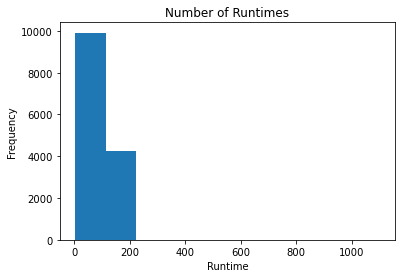

In [59]:
plt.hist(sub_imdb['runtime_minutes'].dropna());
plt.xlabel("Runtime")
plt.ylabel("Frequency")
plt.title("Number of Runtimes")

In [60]:
sub_imdb['runtime_minutes'].isna().value_counts()

False    14200
True       655
Name: runtime_minutes, dtype: int64

In [61]:
# The 1100 appears to be NA as well, less than 5% of the data appears to be NA.  Replacing NA values with Median
median_minutes = sub_imdb['runtime_minutes'].median()
sub_imdb['runtime_minutes'].fillna(median_minutes, inplace=True)
sub_imdb['runtime_minutes'].isna().value_counts()

False    14855
Name: runtime_minutes, dtype: int64

In [62]:
sub_imdb['runtime_minutes'].loc[sub_imdb['runtime_minutes'] == 1100] = median_minutes

C:\Users\Nel-Jiren\Anaconda\envs\learn-env\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [63]:
sub_imdb['runtime_minutes'].describe()

count    14855.000000
mean       103.693235
std         23.017502
min          3.000000
25%         90.000000
50%        102.000000
75%        116.000000
max        450.000000
Name: runtime_minutes, dtype: float64

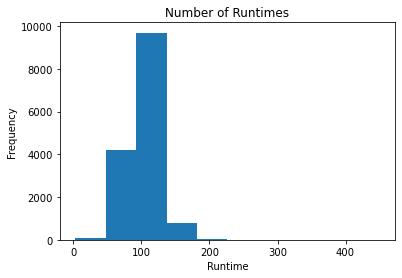

In [64]:
plt.hist(sub_imdb['runtime_minutes'])
plt.xlabel("Runtime")
plt.ylabel("Frequency")
plt.title("Number of Runtimes");

In [65]:
#There appears to be outliers towards the right removing outliers using Q1-1.5xIQR amd Q3+1.5xIQR
q1 = sub_imdb['runtime_minutes'].quantile(.25)
q3 = sub_imdb['runtime_minutes'].quantile(.75)
iqr = q3-q1

In [66]:
final_imdb = sub_imdb.loc[(sub_imdb['runtime_minutes'] >= q1-1.5*iqr) & (sub_imdb['runtime_minutes'] <= q3+1.5*iqr)]

In [67]:
final_imdb

,tconst,nconst,category,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles,primary_title,...,runtime_minutes,genres,averagerating,numvotes,genre_list,Biography,History,War,Music,Sport
37,tt0475290,nm0000982,actor,"[""Eddie Mannix""]",Josh Brolin,1968.0,NaN,"actor,producer,writer","tt4154756,tt1175491,tt0477348,tt1791528","Hail, Caesar!",...,106.0,"Comedy,Drama,Music",6.3,111422.0,"[Comedy, Drama, Music]",False,False,False,True,False
38,tt0475290,nm0000123,actor,"[""Baird Whitlock""]",George Clooney,1961.0,NaN,"actor,producer,director","tt2177771,tt1193138,tt1124035,tt0465538","Hail, Caesar!",...,106.0,"Comedy,Drama,Music",6.3,111422.0,"[Comedy, Drama, Music]",False,False,False,True,False
39,tt0475290,nm2403277,actor,"[""Hobie Doyle""]",Alden Ehrenreich,1989.0,NaN,"actor,soundtrack","tt0475290,tt3778644,tt1682180,tt1559547","Hail, Caesar!",...,106.0,"Comedy,Drama,Music",6.3,111422.0,"[Comedy, Drama, Music]",False,False,False,True,False
40,tt0475290,nm0000146,actor,"[""Laurence Laurentz""]",Ralph Fiennes,1962.0,NaN,"actor,director,soundtrack","tt0387131,tt1201607,tt2278388,tt0108052","Hail, Caesar!",...,106.0,"Comedy,Drama,Music",6.3,111422.0,"[Comedy, Drama, Music]",False,False,False,True,False
41,tt0475290,nm0001053,director,NaN,Ethan Coen,1957.0,NaN,"producer,writer,director","tt6412452,tt0116282,tt1019452,tt2042568","Hail, Caesar!",...,106.0,"Comedy,Drama,Music",6.3,111422.0,"[Comedy, Drama, Music]",False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027498,tt8972568,nm0575478,actor,"[""Dr. Pinheiro Rocha""]",Leonardo Medeiros,1964.0,NaN,"actor,producer","tt0440175,tt1264083,tt0241663,tt0432988",O Paciente: O Caso Tancredo Neves,...,102.0,"Drama,History,Thriller",6.8,79.0,"[Drama, History, Thriller]",False,True,False,False,False
1027499,tt8972568,nm0079343,actor,"[""Dr. Pinotti""]",Paulo Betti,1952.0,NaN,"actor,director,writer","tt6231970,tt0138241,tt0110298,tt0442751",O Paciente: O Caso Tancredo Neves,...,102.0,"Drama,History,Thriller",6.8,79.0,"[Drama, History, Thriller]",False,True,False,False,False
1027500,tt8972568,nm0722109,director,NaN,Sergio Rezende,1951.0,NaN,"writer,director","tt0110298,tt0258902,tt0133011,tt1526306",O Paciente: O Caso Tancredo Neves,...,102.0,"Drama,History,Thriller",6.8,79.0,"[Drama, History, Thriller]",False,True,False,False,False
1027620,tt9071066,nm0120717,actress,"[""Maria Kammerlander""]",Verena Buratti,1973.0,NaN,"actress,casting_director","tt1381407,tt0358351,tt0140653,tt0118799",Manaslu - Berg der Seelen,...,102.0,"Biography,Documentary,Sport",7.3,47.0,"[Biography, Documentary, Sport]",True,False,False,False,True


## Creating subset dataframes for each category

In [68]:
#define a function that will group the df by mean(average_rating) for each genre

In [69]:
#pull out each genre where true
# pull out each category
#  groupby primary_name and mean(average rating)
#  sort by average rating
#  pull out top 5

In [70]:
def genre_pull(df,genre):
    return df.loc[df[genre] == True]
def category_pull(df, category):
    return df.loc[df['category'] == category]

In [71]:
def top_5_cat(df, genre, category):
    data = category_pull(genre_pull(df,genre),category)
    grouped_data = data[['primary_name','averagerating']].groupby('primary_name').mean()
    return grouped_data.sort_values(by = "averagerating",ascending = False).head()
    
    

In [72]:
top_5_cat(final_imdb,"Biography","actor")

,averagerating
primary_name,
Giorgi Megrelishvili,9.6
Frank Whaley,9.5
Roland Rába,9.2
Pál Mácsai,9.2
Feodor Chin,9.1


In [73]:
jobs

['actor', 'actress', 'director', 'producer', 'writer', 'composer']

In [74]:
top_5_genres

['Biography', 'Music', 'History', 'Sport', 'War']

## Run Time per Genre

In [75]:
runtime_df = final_imdb[['tconst','runtime_minutes','averagerating','Biography','Music','History','Sport','War']]


In [76]:
runtime_df = runtime_df.drop_duplicates()

In [77]:
runtime_df

,tconst,runtime_minutes,averagerating,Biography,Music,History,Sport,War
37,tt0475290,106.0,6.3,False,True,False,False,False
58,tt0780548,110.0,6.4,True,False,False,False,False
733,tt1083452,106.0,7.4,True,False,False,False,False
751,tt1124037,139.0,6.9,True,False,False,False,False
772,tt1179035,102.0,7.5,False,False,False,True,False
...,...,...,...,...,...,...,...,...
1026678,tt8176312,102.0,6.2,True,False,False,False,True
1027153,tt8657468,104.0,4.3,False,False,True,False,False
1027497,tt8972568,102.0,6.8,False,False,True,False,False
1027620,tt9071066,102.0,7.3,True,False,False,True,False


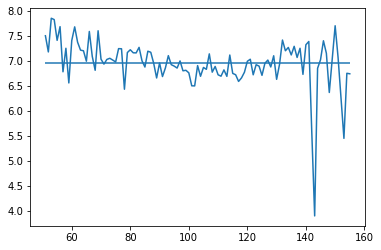

In [78]:
#create line graphs rating vs run time
bio_times = genre_pull(runtime_df,"Biography")[['runtime_minutes','averagerating']].groupby('runtime_minutes').mean().sort_values('runtime_minutes')
plt.plot(bio_times);
plt.hlines(bio_times['averagerating'].mean(), bio_times.index.min(), bio_times.index.max());
# REMEMBER TO TITLE AND LABEL ***************************************

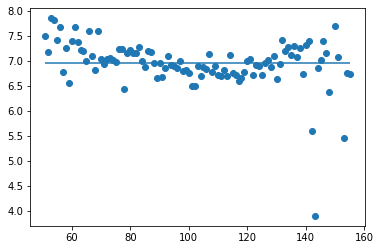

In [79]:
#scatter plots are clearer
plt.scatter(bio_times.index,bio_times['averagerating'])
plt.hlines(bio_times['averagerating'].mean(), bio_times.index.min(), bio_times.index.max());

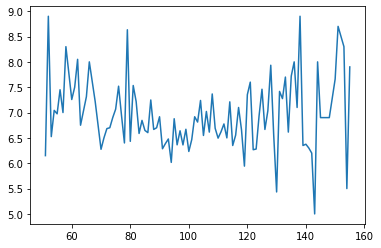

In [80]:
music_times = genre_pull(runtime_df,"Music")[['runtime_minutes','averagerating']].groupby('runtime_minutes').mean().sort_values('runtime_minutes')
plt.plot(music_times);
# REMEMBER TO TITLE AND LABEL ***************************************

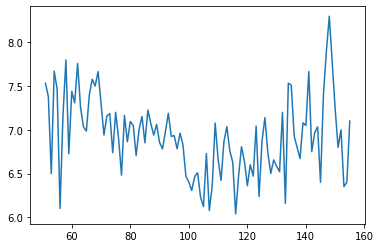

In [81]:
history_times = genre_pull(runtime_df,"History")[['runtime_minutes','averagerating']].groupby('runtime_minutes').mean().sort_values('runtime_minutes')
plt.plot(history_times);

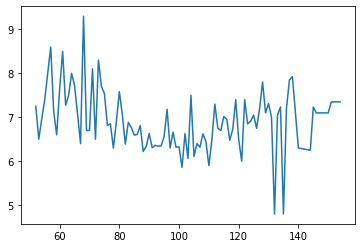

In [82]:
sport_times = genre_pull(runtime_df,"Sport")[['runtime_minutes','averagerating']].groupby('runtime_minutes').mean().sort_values('runtime_minutes')
plt.plot(sport_times);

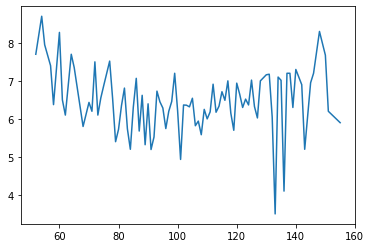

In [83]:
war_times = genre_pull(runtime_df,"War")[['runtime_minutes','averagerating']].groupby('runtime_minutes').mean().sort_values('runtime_minutes')
plt.plot(war_times);

# RT Cleaning and Merging

In [84]:
#merging the 2 RT Tables
main_rt = rt_reviews.merge(rt_movie_info, how = "left", on = "id")

In [85]:
main_rt

,id,review,rating_x,fresh,critic,top_critic,publisher,date,synopsis,rating_y,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002","Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005","Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005","Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003","Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures


In [86]:
main_rt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54432 entries, 0 to 54431
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54432 non-null  int64 
 1   review        48869 non-null  object
 2   rating_x      40915 non-null  object
 3   fresh         54432 non-null  object
 4   critic        51710 non-null  object
 5   top_critic    54432 non-null  int64 
 6   publisher     54123 non-null  object
 7   date          54432 non-null  object
 8   synopsis      54300 non-null  object
 9   rating_y      54346 non-null  object
 10  genre         54345 non-null  object
 11  director      48992 non-null  object
 12  writer        45206 non-null  object
 13  theater_date  53206 non-null  object
 14  dvd_date      53206 non-null  object
 15  currency      33310 non-null  object
 16  box_office    33310 non-null  object
 17  runtime       53594 non-null  object
 18  studio        40125 non-null  object
dtypes: i

In [87]:
# Creating subset to work on
sub_rt = main_rt

## Cleaning rating_x

In [88]:
sub_rt.rating_x.unique()

array(['3/5', nan, 'C', '2/5', 'B-', '2/4', 'B', '3/4', '4/5', '4/4',
       '6/10', '1/4', '8', '2.5/4', '4/10', '2.0/5', '3/10', '7/10', 'A-',
       '5/5', 'F', '3.5/4', 'D+', '1.5/4', '3.5/5', '8/10', 'B+', '9/10',
       '2.5/5', '7.5/10', '5.5/10', 'C-', '1.5/5', '1/5', '5/10', 'C+',
       '0/5', '6', '0.5/4', 'D', '3.1/5', '3/6', '4.5/5', '0/4', '2/10',
       'D-', '7', '1/10', '3', 'A+', 'A', '4.0/4', '9.5/10', '2.5',
       '2.1/2', '6.5/10', '3.7/5', '8.4/10', '9', '1', '7.2/10', '2.2/5',
       '0.5/10', '5', '0', '2', '4.5', '7.7', '5.0/5', '8.5/10', '3.0/5',
       '0.5/5', '1.5/10', '3.0/4', '2.3/10', '4.5/10', '4/6', '3.5',
       '8.6/10', '6/8', '2.0/4', '2.7', '4.2/10', '5.8', '4', '7.1/10',
       '5/4', 'N', '3.5/10', '5.8/10', 'R', '4.0/5', '0/10', '5.0/10',
       '5.9/10', '2.4/5', '1.9/5', '4.9', '7.4/10', '1.5', '2.3/4',
       '8.8/10', '4.0/10', '2.2', '3.8/10', '6.8/10', '7.3', '7.0/10',
       '3.2', '4.2', '8.4', '5.5/5', '6.3/10', '7.6/10', '8.1/10',
  

In [89]:
# strategy: change ratings to a percent out of 100
# assign a value to the letters F - A+
# use rotten/fresh to determine if single values (not formatted x/y) are out of 5 or 10
# drop everything else (grades beyond F, single values with NA for rotten/fresh

### Building function to clean letter ratings

In [90]:
def rating_clean(value):
    #Need to improve spread for letters E- and below
    letter_grades = {"A+":10,"A":9,"A-":8,"B+":8,"B":7,"B-":6,"C+":6,"C":5,"C-":4, "D+":4, "D":3,"D-":2,"E+":2, "E":1,"E-":0, "F+":0,"F":0,"F-":0}
    if value in letter_grades:
        return letter_grades[value]
    # handling single values
#     if ("/" not in value) and float(value):
#         number = float(value)
#         if (number < 5) and (rotten == "fresh"):
#             return number/5 * 10
#         else:
#             return number 
    # Need to handle values like 3 1/2
    if " " in value and "/" in value:
        split_mix = value.split(" ")
        num = split_mix[0]
        den = split_mix[1].split("/")
        number = float(num) + (float(den[0])/float(den[1]))
        return number
    if "/" in value:
        split = value.split("/")
        return float(split[0])/float(split[1])*10


In [91]:
# sub_rt.loc[:,['rating_x','fresh']]

In [92]:
# sub_rt.loc[0]

In [93]:
#function test
# sub_rt.apply(lambda x: rating_clean(x['rating_x'],x['fresh']))

#### Dropping NA values first

In [94]:
sub_rt = sub_rt.loc[sub_rt['rating_x'].dropna().index]

#### Changing letter ratings to values 0-10

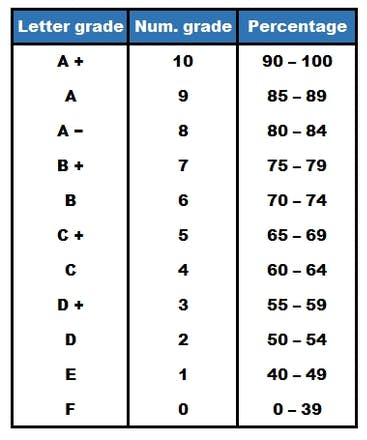

In [95]:
import IPython.display as Disp
url = 'https://studyportals-cdn2.imgix.net/59773a090d5bd.jpg?w=660&h=440&auto=format,compress&q=40'
Disp.Image(requests.get(url).content)

In [96]:
sub_rt.rating_x[13]

'B'

In [97]:
#testing function
rating_clean(sub_rt.rating_x[13])

7

#### Converting x/y into a single value

In [98]:
split_test = sub_rt.rating_x[0].split("/")

In [99]:
float(split_test[0])/float(split_test[1])*10

6.0

In [100]:
"/" in sub_rt.rating_x[0]

True

In [101]:
rating_clean(sub_rt.rating_x[0])

6.0

In [102]:
rating_clean(sub_rt.rating_x[54430])

5.0

#### Checking rotten/fresh for single values

In [103]:
test = "5.6"

In [104]:
"/" in test

False

### Create column for numbered ratings

In [105]:
sub_rt['num_rating'] = sub_rt['rating_x'].apply(lambda x: rating_clean(x))

In [106]:
sub_rt['num_rating'].describe()

count    40156.000000
mean         6.221272
std          2.113994
min          0.000000
25%          5.000000
50%          6.250000
75%          8.000000
max         15.000000
Name: num_rating, dtype: float64

In [107]:
#set ratings above 10 down to 10
sub_rt['num_rating'].loc[sub_rt['num_rating'] > 10] = 10

C:\Users\Nel-Jiren\Anaconda\envs\learn-env\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [108]:
sub_rt['num_rating'].describe()

count    40156.000000
mean         6.220874
std          2.113061
min          0.000000
25%          5.000000
50%          6.250000
75%          8.000000
max         10.000000
Name: num_rating, dtype: float64

## Cleaning reviews

In [109]:
# Strategy:
# drop null reviews
# Convert the reviews into a list
# Remove the stop words from each review
# Create a dictionary for each row containing {words: [list of words], rating: num_rating}

# Convert that dictionary into a dataframe for each row
# testdf = pd.DataFrame({'words':["a","b","c"],'rating':10})

# Create a new words dataframe- build by appending each rows rating dataframe to the bottom
# group by word on average rating
# show results from the top ratings, show results from the bottom rating


### Dropping NA values first

In [110]:
sub_rt = sub_rt.loc[sub_rt['review'].dropna().index]

### Converting words in review into a list

#unpacks a value into lists
def unpack(df,col,sepp):
    return df[col].fillna("").map(lambda row: row.split(sepp))

In [111]:
sub_rt['reviews_list'] = unpack(sub_rt,'review'," ")

In [112]:
sub_rt['reviews_list']

0        [A, distinctly, gallows, take, on, contemporar...
6        [Quickly, grows, repetitive, and, tiresome,, m...
7        [Cronenberg, is, not, a, director, to, be, dau...
11       [While, not, one, of, Cronenberg's, stronger, ...
12       [Robert, Pattinson, works, mighty, hard, to, m...
                               ...                        
54420    [The, spaniel-eyed, Jean, Reno, infuses, Huber...
54421    [Manages, to, be, somewhat, well-acted,, not, ...
54422    [Arguably, the, best, script, that, Besson, ha...
54423    [Despite, the, title,, Wasabi, isn't, so, spicy.]
54424    [Dawdles, and, drags, when, it, should, pop;, ...
Name: reviews_list, Length: 35379, dtype: object

### Importing stopwords from Natural Language Toolkit and removing them from reviews

In [113]:
import nltk
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [114]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [115]:
len(stopwords)

179

In [116]:
#the stop words are lower case, need to do the same for the words in reviews

In [117]:
#def a function to go through list of words in review and remove the stop words
def remove_stops(texts):
    cleaned = []
    punctuations = ",.!@# $%^&*()?"
    for i in range(len(texts)):
        if texts[i].lower() not in stopwords:
            cleaned.append(texts[i].lower().strip(punctuations))    
    return cleaned

In [118]:
checker = ["Flatiron","is","life","discourse,","ending."]

In [119]:
remove_stops(checker)

['flatiron', 'life', 'discourse', 'ending']

### create new column with dataframe of words and rating

In [120]:
sub_rt['reviews_list'] = sub_rt['reviews_list'].apply(lambda x: remove_stops(x))

In [121]:
sub_rt

,id,review,rating_x,fresh,critic,top_critic,publisher,date,synopsis,rating_y,...,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,num_rating,reviews_list
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018","New York City, not-too-distant-future: Eric Pa...",R,...,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,6.00,"[distinctly, gallows, take, contemporary, fina..."
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013","New York City, not-too-distant-future: Eric Pa...",R,...,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,5.00,"[quickly, grows, repetitive, tiresome, meander..."
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013","New York City, not-too-distant-future: Eric Pa...",R,...,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,4.00,"[cronenberg, director, daunted, scenario, anti..."
11,3,"While not one of Cronenberg's stronger films, ...",B-,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013","New York City, not-too-distant-future: Eric Pa...",R,...,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,6.00,"[one, cronenberg's, stronger, films, anti-capi..."
12,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013","New York City, not-too-distant-future: Eric Pa...",R,...,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,5.00,"[robert, pattinson, works, mighty, hard, make,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54420,2000,The spaniel-eyed Jean Reno infuses Hubert with...,3/4,fresh,Megan Turner,1,New York Post,"September 27, 2002","Suspended from the force, Paris cop Hubert is ...",R,...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures,7.50,"[spaniel-eyed, jean, reno, infuses, hubert, mi..."
54421,2000,"Manages to be somewhat well-acted, not badly a...",1.5/4,rotten,Bob Strauss,0,Los Angeles Daily News,"September 27, 2002","Suspended from the force, Paris cop Hubert is ...",R,...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures,3.75,"[manages, somewhat, well-acted, badly, art-dir..."
54422,2000,Arguably the best script that Besson has writt...,3.5/5,fresh,Wade Major,0,Boxoffice Magazine,"September 27, 2002","Suspended from the force, Paris cop Hubert is ...",R,...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures,7.00,"[arguably, best, script, besson, written, years]"
54423,2000,"Despite the title, Wasabi isn't so spicy.",C,rotten,NaN,0,E! Online,"September 27, 2002","Suspended from the force, Paris cop Hubert is ...",R,...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures,5.00,"[despite, title, wasabi, spicy]"


In [122]:
def create_pd(row):
    return pd.DataFrame({'words': row['reviews_list'],'rating':row['num_rating']})

In [123]:
sub_rt['word_ratings'] = sub_rt.apply(lambda x: create_pd(x), axis = 1)

In [124]:
sub_rt['word_ratings'].iloc[0]

,words,rating
0,distinctly,6.0
1,gallows,6.0
2,take,6.0
3,contemporary,6.0
4,financial,6.0
5,mores,6.0
6,one,6.0
7,absurdly,6.0
8,rich,6.0
9,man's,6.0


## Creating new dataframe with all words and ratings they're associated with

In [125]:
words_df = pd.DataFrame(columns = ['words','rating'])

In [126]:
for i in range(0,len(sub_rt)):
    words_df = words_df.append(sub_rt['word_ratings'].iloc[i])

In [127]:
words_df

,words,rating
0,distinctly,6.0
1,gallows,6.0
2,take,6.0
3,contemporary,6.0
4,financial,6.0
...,...,...
7,violence,3.0
8,break,3.0
9,tedium,3.0
10,generational,3.0


In [128]:
grouped_words = words_df.groupby(['words']).agg(['mean','count'])

In [129]:
grouped_words

rating      
                  mean count
words                       
              6.403728  2575
""the         8.000000     1
"'break-up"   5.000000     1
"'huckabees"  6.250000     1
"'truth'      4.000000     1
...                ...   ...
zwart         8.000000     1
zwellinger    7.000000     1
zwick         7.666667     3
zwick's       4.000000     1
zzzzs         4.000000     1

[40479 rows x 2 columns]

In [130]:
grouped_words.describe()

rating              
               mean         count
count  40142.000000  40479.000000
mean       6.189774      9.982509
std        1.762902     58.211641
min        0.000000      0.000000
25%        5.000000      1.000000
50%        6.250000      1.000000
75%        7.500000      5.000000
max       10.000000   5035.000000

In [131]:
#what limit of count should I use

# SUPERCEDED
##### Want to use: name basics, title basics, title crew, title ratings

##### Name basics require unpacking professions and known for titles from strings to lists

imdb_name_basics

imdb_name_basics.info()

imdb_name_basics['primary_profession'].fillna("").map(lambda prof: prof.split(","))

unpack(imdb_name_basics,'primary_profession',",")

cleaned_imdb_name_basics = imdb_name_basics

cleaned_imdb_name_basics['primary_profession'] = unpack(cleaned_imdb_name_basics,'primary_profession',",")

cleaned_imdb_name_basics['known_for_titles'] = unpack(cleaned_imdb_name_basics,'known_for_titles',',')

cleaned_imdb_name_basics['is_producer'] = cleaned_imdb_name_basics['primary_profession'].apply(lambda x: "producer" in x)

cleaned_imdb_name_basics['is_writer'] = cleaned_imdb_name_basics['primary_profession'].apply(lambda x: "writer" in x)

cleaned_imdb_name_basics['is_acting'] = cleaned_imdb_name_basics['primary_profession'].apply(lambda x: ("actor" in x) or ("actress" in x))

cleaned_imdb_name_basics['is_director'] = cleaned_imdb_name_basics['primary_profession'].apply(lambda x: "director" in x)

cleaned_imdb_name_basics

cleaned_imdb_name_basics['known_for_titles'].apply(lambda x: len(x)).max()

imdb_main = imdb_title_principals.merge(cleaned_imdb_name_basics,how="left", on="nconst")

imdb_title_principals.info()

cleaned_imdb_name_basics.info()

cleaned_imdb_name_basics['nconst'].isna().value_counts()

imdb_main.info()

imdb_main

imdb_main['category'].isna().value_counts()

clean_ratings.loc[:,['tconst','averagerating']].groupby(by='tconst').mean()

# Cleanup Tests for IMDB

## Merging the Data sets

In [26]:
#unpacks a value into lists
def unpack(df,col,sepp):
    return df[col].fillna("").map(lambda row: row.split(sepp))

### IMDB Merge

In [27]:
#merging the IMDB databases on principals

In [28]:
main_imdb = imdb_title_principals

In [29]:
main_imdb = main_imdb.merge(imdb_name_basics, how = "left", on="nconst")

In [30]:
main_imdb = main_imdb.merge(imdb_title_basics, how = "left", on = "tconst")

In [31]:
#clean the ratings first, then merge into the main tab
main_imdb = main_imdb.merge(imdb_title_ratings, how = "left", on = "tconst")

In [32]:
main_imdb

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]",Tommy Dysart,NaN,NaN,actor,"tt0093120,tt0076974,tt0084296,tt0077064",A Thin Life,A Thin Life,2018,75.0,Comedy,NaN,NaN
1,tt0111414,2,nm0398271,director,NaN,NaN,Frank Howson,1952.0,NaN,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414",A Thin Life,A Thin Life,2018,75.0,Comedy,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN,Barry Porter-Robinson,NaN,NaN,"producer,art_department","tt0290884,tt0101374,tt0111414,tt1566940",A Thin Life,A Thin Life,2018,75.0,Comedy,NaN,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181",The Wicker Tree,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328.0
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]",Brittania Nicol,NaN,NaN,"actress,soundtrack",tt0323808,The Wicker Tree,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]",Kenneth Cranham,1944.0,NaN,"actor,soundtrack","tt0095294,tt0375912,tt0063385,tt0985699",Disnatured,Disnatured,2016,NaN,"Drama,Fantasy,Horror",NaN,NaN
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]",Pearl Mackie,1987.0,NaN,actress,"tt9676034,tt5498354,tt0436992,tt8972256",Disnatured,Disnatured,2016,NaN,"Drama,Fantasy,Horror",NaN,NaN
1028183,tt9692684,3,nm10441594,director,NaN,NaN,Guy Jones,NaN,NaN,director,NaN,Disnatured,Disnatured,2016,NaN,"Drama,Fantasy,Horror",NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN,Sabrina Mahfouz,NaN,NaN,writer,"tt5191128,tt3254170,tt2319282,tt8452302",Disnatured,Disnatured,2016,NaN,"Drama,Fantasy,Horror",NaN,NaN


### Rotten Tomatoes Merge

In [33]:
main_rt = rt_reviews.merge(rt_movie_info, how = "left", on = "id")

In [34]:
main_rt

,id,review,rating_x,fresh,critic,top_critic,publisher,date,synopsis,rating_y,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002","Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005","Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005","Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003","Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures


## IMDB Data Cleaning

In [35]:
main_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1028186 entries, 0 to 1028185
Data columns (total 18 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   tconst              1028186 non-null  object 
 1   ordering            1028186 non-null  int64  
 2   nconst              1028186 non-null  object 
 3   category            1028186 non-null  object 
 4   job                 177684 non-null   object 
 5   characters          393360 non-null   object 
 6   primary_name        1027912 non-null  object 
 7   birth_year          234048 non-null   float64
 8   death_year          11843 non-null    float64
 9   primary_profession  974266 non-null   object 
 10  known_for_titles    997445 non-null   object 
 11  primary_title       1028186 non-null  object 
 12  original_title      1028186 non-null  object 
 13  start_year          1028186 non-null  int64  
 14  runtime_minutes     827933 non-null   float64
 15  genres         

In [36]:
main_imdb

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]",Tommy Dysart,NaN,NaN,actor,"tt0093120,tt0076974,tt0084296,tt0077064",A Thin Life,A Thin Life,2018,75.0,Comedy,NaN,NaN
1,tt0111414,2,nm0398271,director,NaN,NaN,Frank Howson,1952.0,NaN,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414",A Thin Life,A Thin Life,2018,75.0,Comedy,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN,Barry Porter-Robinson,NaN,NaN,"producer,art_department","tt0290884,tt0101374,tt0111414,tt1566940",A Thin Life,A Thin Life,2018,75.0,Comedy,NaN,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181",The Wicker Tree,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328.0
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]",Brittania Nicol,NaN,NaN,"actress,soundtrack",tt0323808,The Wicker Tree,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]",Kenneth Cranham,1944.0,NaN,"actor,soundtrack","tt0095294,tt0375912,tt0063385,tt0985699",Disnatured,Disnatured,2016,NaN,"Drama,Fantasy,Horror",NaN,NaN
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]",Pearl Mackie,1987.0,NaN,actress,"tt9676034,tt5498354,tt0436992,tt8972256",Disnatured,Disnatured,2016,NaN,"Drama,Fantasy,Horror",NaN,NaN
1028183,tt9692684,3,nm10441594,director,NaN,NaN,Guy Jones,NaN,NaN,director,NaN,Disnatured,Disnatured,2016,NaN,"Drama,Fantasy,Horror",NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN,Sabrina Mahfouz,NaN,NaN,writer,"tt5191128,tt3254170,tt2319282,tt8452302",Disnatured,Disnatured,2016,NaN,"Drama,Fantasy,Horror",NaN,NaN


### Unpacking Genres

In [37]:
main_imdb['genres'].values

array(['Comedy', 'Comedy', 'Comedy', ..., 'Drama,Fantasy,Horror',
       'Drama,Fantasy,Horror', 'Drama,Fantasy,Horror'], dtype=object)

In [38]:
#creating new column converting string to a list of genres
main_imdb['genre_list'] = unpack(main_imdb,'genres',",")

In [39]:
main_imdb['genre_list'].values

array([list(['Comedy']), list(['Comedy']), list(['Comedy']), ...,
       list(['Drama', 'Fantasy', 'Horror']),
       list(['Drama', 'Fantasy', 'Horror']),
       list(['Drama', 'Fantasy', 'Horror'])], dtype=object)

In [40]:
#generating a list of unique genres
unique_genres = []
for genres in main_imdb['genre_list'].values:
    for genre in genres:
        if genre not in unique_genres:
            unique_genres.append(genre)
    

In [41]:
unique_genres

['Comedy',
 'Drama',
 'Horror',
 'Fantasy',
 'Music',
 'Adventure',
 'Mystery',
 'Biography',
 'Crime',
 'Thriller',
 'Animation',
 'Family',
 'Documentary',
 'Action',
 '',
 'Musical',
 'Sport',
 'Romance',
 'History',
 'War',
 'Sci-Fi',
 'News',
 'Western',
 'Reality-TV',
 'Adult',
 'Talk-Show',
 'Game-Show',
 'Short']

In [42]:
len(unique_genres)

28

In [43]:
#creating a column for each unique genre, and checking if the column name is in the list of genres for each
for genre in unique_genres:
    main_imdb[genre] = main_imdb['genre_list'].apply(lambda x: genre in x)

In [44]:
main_imdb['Comedy'].value_counts()

False    814007
True     214179
Name: Comedy, dtype: int64

In [45]:
main_imdb

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,...,History,War,Sci-Fi,News,Western,Reality-TV,Adult,Talk-Show,Game-Show,Short
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]",Tommy Dysart,NaN,NaN,actor,...,False,False,False,False,False,False,False,False,False,False
1,tt0111414,2,nm0398271,director,NaN,NaN,Frank Howson,1952.0,NaN,"actor,writer,producer",...,False,False,False,False,False,False,False,False,False,False
2,tt0111414,3,nm3739909,producer,producer,NaN,Barry Porter-Robinson,NaN,NaN,"producer,art_department",...,False,False,False,False,False,False,False,False,False,False
3,tt0323808,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director",...,False,False,False,False,False,False,False,False,False,False
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]",Brittania Nicol,NaN,NaN,"actress,soundtrack",...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]",Kenneth Cranham,1944.0,NaN,"actor,soundtrack",...,False,False,False,False,False,False,False,False,False,False
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]",Pearl Mackie,1987.0,NaN,actress,...,False,False,False,False,False,False,False,False,False,False
1028183,tt9692684,3,nm10441594,director,NaN,NaN,Guy Jones,NaN,NaN,director,...,False,False,False,False,False,False,False,False,False,False
1028184,tt9692684,4,nm6009913,writer,writer,NaN,Sabrina Mahfouz,NaN,NaN,writer,...,False,False,False,False,False,False,False,False,False,False


In [46]:
main_imdb['category'].unique()

array(['actor', 'director', 'producer', 'editor', 'actress', 'composer',
       'cinematographer', 'writer', 'self', 'production_designer',
       'archive_footage', 'archive_sound'], dtype=object)

In [47]:
main_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1028186 entries, 0 to 1028185
Data columns (total 47 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   tconst              1028186 non-null  object 
 1   ordering            1028186 non-null  int64  
 2   nconst              1028186 non-null  object 
 3   category            1028186 non-null  object 
 4   job                 177684 non-null   object 
 5   characters          393360 non-null   object 
 6   primary_name        1027912 non-null  object 
 7   birth_year          234048 non-null   float64
 8   death_year          11843 non-null    float64
 9   primary_profession  974266 non-null   object 
 10  known_for_titles    997445 non-null   object 
 11  primary_title       1028186 non-null  object 
 12  original_title      1028186 non-null  object 
 13  start_year          1028186 non-null  int64  
 14  runtime_minutes     827933 non-null   float64
 15  genres         

### Checking Deceased Status or Retirement Age

In [48]:
#Do not want to use anyone with a non-null death year, or anyone over the age of 75 who is likely retired (Spielberg is 74).
main_imdb.loc[(main_imdb['death_year'].isna() == True) & (main_imdb['birth_year'] > 1945)]

In [49]:
main_imdb.loc[(main_imdb['death_year'].isna() == True) & (main_imdb['birth_year'] > 1945)]

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,...,History,War,Sci-Fi,News,Western,Reality-TV,Adult,Talk-Show,Game-Show,Short
1,tt0111414,2,nm0398271,director,NaN,NaN,Frank Howson,1952.0,NaN,"actor,writer,producer",...,False,False,False,False,False,False,False,False,False,False
6,tt0323808,3,nm0574615,actor,NaN,"[""Sir Lachlan Morrison""]",Graham McTavish,1961.0,NaN,"actor,soundtrack,director",...,False,False,False,False,False,False,False,False,False,False
7,tt0323808,4,nm0502652,actress,NaN,"[""Lady Delia Morrison""]",Jacqueline Leonard,1967.0,NaN,actress,...,False,False,False,False,False,False,False,False,False,False
14,tt0417610,1,nm0532721,actor,NaN,"[""Lucio""]",Luis Machín,1968.0,NaN,"actor,cinematographer",...,False,False,False,False,False,False,False,False,False,False
15,tt0417610,2,nm0330974,actress,NaN,"[""Diana""]",Esther Goris,1963.0,NaN,"actress,writer,director",...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028108,tt9595332,4,nm4285647,editor,NaN,NaN,Marco Rizzo,1984.0,NaN,"editor,editorial_department",...,True,False,False,False,False,False,False,False,False,False
1028111,tt9658966,3,nm1714943,director,NaN,NaN,Joross Gamboa,1984.0,NaN,"actor,soundtrack,director",...,False,False,False,False,False,False,False,False,False,False
1028125,tt9670776,4,nm1625509,actor,NaN,"[""Petras Klimas""]",Rolandas Kazlas,1969.0,NaN,actor,...,False,False,False,False,False,False,False,False,False,False
1028160,tt9678962,2,nm7786516,cinematographer,NaN,NaN,Evert Bazuin,1995.0,NaN,"camera_department,cinematographer,director",...,False,False,False,False,False,False,False,False,False,False


### Top 5 Genres using Title Basics and Title Genres

In [50]:
ratings = imdb_title_basics.merge(imdb_title_ratings, on = "tconst", how = "inner")

In [51]:
ratings

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


In [52]:
ratings['averagerating'].isna().value_counts()

False    73856
Name: averagerating, dtype: int64

In [53]:
ratings['averagerating'].describe()

count    73856.000000
mean         6.332729
std          1.474978
min          1.000000
25%          5.500000
50%          6.500000
75%          7.400000
max         10.000000
Name: averagerating, dtype: float64

In [54]:
ratings['genres'].isna().value_counts()

False    73052
True       804
Name: genres, dtype: int64

In [55]:
clean_ratings = ratings.loc[ratings['genres'].dropna().index]

In [56]:
clean_ratings

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73850,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8


In [57]:
clean_ratings['genre_list'] = unpack(clean_ratings,'genres',",")

In [58]:
for genre in unique_genres:
    clean_ratings[genre] = clean_ratings['genre_list'].apply(lambda x: genre in x)

In [59]:
clean_ratings.loc[clean_ratings['Comedy']].loc[:,['averagerating']].mean()

averagerating    6.002689
dtype: float64

In [60]:
clean_ratings['start_year'].describe()

count    73052.000000
mean      2014.281430
std          2.615288
min       2010.000000
25%       2012.000000
50%       2014.000000
75%       2017.000000
max       2019.000000
Name: start_year, dtype: float64

In [61]:
average_ratings = []
for genre in unique_genres:
    average = clean_ratings.loc[clean_ratings[genre]].loc[:,['averagerating']].mean()
    average_ratings.append([genre,average])

In [62]:
average_ratings

[['Comedy',
  averagerating    6.002689
  dtype: float64],
 ['Drama',
  averagerating    6.401559
  dtype: float64],
 ['Horror',
  averagerating    5.00344
  dtype: float64],
 ['Fantasy',
  averagerating    5.919473
  dtype: float64],
 ['Music',
  averagerating    7.091972
  dtype: float64],
 ['Adventure',
  averagerating    6.196201
  dtype: float64],
 ['Mystery',
  averagerating    5.920401
  dtype: float64],
 ['Biography',
  averagerating    7.162274
  dtype: float64],
 ['Crime',
  averagerating    6.115441
  dtype: float64],
 ['Thriller',
  averagerating    5.639114
  dtype: float64],
 ['Animation',
  averagerating    6.248308
  dtype: float64],
 ['Family',
  averagerating    6.394725
  dtype: float64],
 ['Documentary',
  averagerating    7.33209
  dtype: float64],
 ['Action',
  averagerating    5.810361
  dtype: float64],
 ['',
  averagerating   NaN
  dtype: float64],
 ['Musical',
  averagerating    6.498336
  dtype: float64],
 ['Sport',
  averagerating    6.961493
  dtype: float6

In [63]:
average_votes = []
for genre in unique_genres:
    average = clean_ratings.loc[clean_ratings[genre]].loc[:,['numvotes']].mean()
    average_votes.append([genre,average])

In [64]:
average_votes

[['Comedy',
  numvotes    4297.617409
  dtype: float64],
 ['Drama',
  numvotes    3883.574769
  dtype: float64],
 ['Horror',
  numvotes    3112.417905
  dtype: float64],
 ['Fantasy',
  numvotes    12387.443086
  dtype: float64],
 ['Music',
  numvotes    2771.020833
  dtype: float64],
 ['Adventure',
  numvotes    22067.74666
  dtype: float64],
 ['Mystery',
  numvotes    8113.618295
  dtype: float64],
 ['Biography',
  numvotes    5673.259648
  dtype: float64],
 ['Crime',
  numvotes    8594.959011
  dtype: float64],
 ['Thriller',
  numvotes    5860.449434
  dtype: float64],
 ['Animation',
  numvotes    8808.549627
  dtype: float64],
 ['Family',
  numvotes    2531.274912
  dtype: float64],
 ['Documentary',
  numvotes    266.960232
  dtype: float64],
 ['Action',
  numvotes    14476.48569
  dtype: float64],
 ['',
  numvotes   NaN
  dtype: float64],
 ['Musical',
  numvotes    1925.055479
  dtype: float64],
 ['Sport',
  numvotes    3185.601357
  dtype: float64],
 ['Romance',
  numvotes    4084

In [65]:
vote_outliers = list(map(lambda x: x[1],average_votes))
pd.DataFrame(vote_outliers).describe()

In [66]:
pd.DataFrame(vote_outliers).describe()

,numvotes
count,26.000000
mean,5701.324266
std,5842.127527
min,8.000000
25%,2076.610337
50%,3534.588063
75%,8474.623832
max,22067.746660


In [67]:
#do not want to pick categories with less than 2076 average votes

In [68]:
#removing
genres_to_remove = list(filter(lambda x: x[1].mean() < 2076, average_votes))
genres_to_remove = list(map(lambda x: x[0], genres_to_remove))
average_ratings_sorted = list(filter(lambda x: x[0] not in genres_to_remove,average_ratings))
average_ratings_sorted = sorted(average_ratings_sorted,key=lambda x:x[1].mean(), reverse=True)
top_5_genres = list(map(lambda x:x[0],average_ratings_sorted[:5]))
top_5_genres

In [69]:
average_ratings_sorted = list(filter(lambda x: x[0] not in genres_to_remove,average_ratings))

In [70]:
average_ratings_sorted = sorted(average_ratings_sorted,key=lambda x:x[1].mean(), reverse=True)

In [71]:
average_ratings_sorted.pop(2)

['',
 averagerating   NaN
 dtype: float64]

In [72]:
top_5_genres = list(map(lambda x:x[0],average_ratings_sorted[:5]))

In [73]:
top_5_genres

['Biography', 'Music', 'History', 'Sport', 'War']

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,genre_list,Comedy,...,History,War,Sci-Fi,News,Western,Reality-TV,Adult,Talk-Show,Game-Show,Short
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,"[Action, Crime, Drama]",False,...,False,False,False,False,False,False,False,False,False,False
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,"[Biography, Drama]",False,...,False,False,False,False,False,False,False,False,False,False
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,[Drama],False,...,False,False,False,False,False,False,False,False,False,False
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13,"[Comedy, Drama]",True,...,False,False,False,False,False,False,False,False,False,False
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,"[Comedy, Drama, Fantasy]",True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73850,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5,[Documentary],False,...,False,False,False,False,False,False,False,False,False,False
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6,[Documentary],False,...,False,False,False,False,False,False,False,False,False,False
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136,"[Drama, Family]",False,...,False,False,False,False,False,False,False,False,False,False
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8,[Documentary],False,...,False,False,False,False,False,False,False,False,False,False


In [77]:
clean_ratings['runtime_minutes'].isna().value_counts()

False    65720
True      7332
Name: runtime_minutes, dtype: int64

In [82]:
clean_ratings.loc[clean_ratings['runtime_minutes']>50000]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,genre_list,Comedy,...,History,War,Sci-Fi,News,Western,Reality-TV,Adult,Talk-Show,Game-Show,Short
70280,tt8273150,Logistics,Logistics,2012,51420.0,Documentary,5.0,17,[Documentary],False,...,False,False,False,False,False,False,False,False,False,False


In [88]:
clean_ratings.loc[:,['tconst','averagerating']].groupby(by='tconst').mean()

,averagerating
tconst,
tt0063540,7.0
tt0066787,7.2
tt0069049,6.9
tt0069204,6.1
tt0100275,6.5
...,...
tt9913056,6.2
tt9913084,6.2
tt9914286,8.7


(array([  360.,   967.,  2616.,  5030.,  9347., 15735., 19460., 13093.,
         6248.,  1000.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

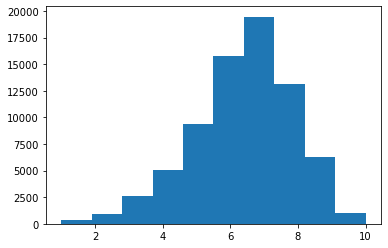

In [157]:
plt.hist(ratings['averagerating'])

In [249]:
rt_movie_info['genre'].unique()

array(['Action and Adventure|Classics|Drama',
       'Drama|Science Fiction and Fantasy',
       'Drama|Musical and Performing Arts', 'Drama|Mystery and Suspense',
       'Drama|Romance', 'Drama|Kids and Family', 'Comedy', 'Drama',
       'Action and Adventure|Mystery and Suspense|Science Fiction and Fantasy',
       nan, 'Documentary', 'Documentary|Special Interest',
       'Classics|Comedy|Drama', 'Comedy|Drama|Mystery and Suspense',
       'Action and Adventure|Comedy|Drama',
       'Action and Adventure|Drama|Science Fiction and Fantasy',
       'Art House and International|Comedy|Drama|Musical and Performing Arts',
       'Musical and Performing Arts',
       'Classics|Comedy|Musical and Performing Arts|Romance',
       'Action and Adventure|Drama|Mystery and Suspense',
       'Action and Adventure|Mystery and Suspense',
       'Art House and International|Classics|Horror|Mystery and Suspense',
       'Horror',
       'Action and Adventure|Classics|Drama|Mystery and Suspense',
   

In [250]:
sub_imdb['start_year'].describe()

count    14855.000000
mean      2014.304611
std          2.604677
min       2010.000000
25%       2012.000000
50%       2014.000000
75%       2017.000000
max       2019.000000
Name: start_year, dtype: float64